<a href="https://colab.research.google.com/github/zidnytaqiya/AnalisisDataIDCamp/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Rahma Zidny Taqiya
- **Email:** zidnytaqiya@gmail.com
- **ID Dicoding:** zidnytaqiya

## Menentukan Pertanyaan Bisnis

- Apakah ada pola musiman yang konsisten yang dapat dimanfaatkan untuk perencanaan operasional?
- Apakah terdapat hubungan yang signifikan antara suhu dan jumlah pengguna sepeda?
- Apakah terdapat hubungan yang signifikan antara waktu dalam sehari dan jumlah pengguna sepeda?
- Apakah ada perbedaan signifikan dalam jumlah penyewaan sepeda antara tahun pertama (2011) dan tahun kedua (2012)?

## Import Semua Packages/Library yang Digunakan

In [16]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy.stats import zscore

## Data Wrangling

### Gathering Data

Pada proyek analisis data kali ini, saya menggunakan Bike Sharing Data yang ada di kaggle. Dataset yang mencatat informasi perjalanan sepeda secara otomatis. Data ini mencakup atribut terkait waktu, kondisi cuaca, dan jumlah pengguna sepeda, baik pengguna kasual maupun terdaftar.

In [17]:
!git clone https://github.com/zidnytaqiya/AnalisisDataIDCamp.git

Cloning into 'AnalisisDataIDCamp'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 16 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (16/16), 738.56 KiB | 4.70 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [18]:
%cd AnalisisDataIDCamp

/content/AnalisisDataIDCamp/AnalisisDataIDCamp


In [19]:
data = pd.read_csv("hour.csv")
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
Penjelasan Variabel
- instant : Penanda urutan rekaman
- dteday : Tanggal pencatatan data
- season : Musim dalam setahun (1 : Musim Semi, 2 : Musim Panas, 3 : Musim Gugur, 4 : Musim Dingin)
- yr : Tahun pencatatan (0 : 2011, 1  : 2012)
- mnth : Bulan dalam setahun (1-12)
- hr : Jam pencatatan (0-23)
- holiday : Indikator hari libur (0 : Bukan hari libur, 1 : Hari libur)
- weekday : Hari dalam seminggu (0 : Minggu, 1 : Senin, dst)
- workingdat : Indikator hari kerja (0 : Bukan hari kerja, 1 : Hari kerja)
- weathersit : Kategori kondisi cuaca (1 : Cerah atau sedikit berawan, 2 : Berkabut atau berawan seharian, 3 : Hujan ringan atau salju ringan, 4 : Hujan deras atau salju tebal)
- temp : Suhu ternormalisasi, skala 0-1
- atemp : Suhu yang dirasakan, skala 0-1
- hum : Kelembaban udara, skala 0-1
- windspeed : Kecepatan angin, skala 0-1
- casual : Jumlah pengguna kasual (bukan anggota terdaftar)
- registered : Jumlah pengguna terdaftar
- cnt : Jumlah total peminjaman terdaftar (gabungan anggora casual dan terdaftar)

### Assessing Data

In [20]:
# Informasi Dasar
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
Informasi dan struktur dataset
- Jumlas baris pada dataset adalah 17.379 dengan jumlah kolom adalah 17.
- Dataset terdiri dari tiga jenis data
  - Integer : instant, season, tr, mnth, hr, holiday, weekday, workingday, weathersit, casual, registered, cnt
  - Float : temp, atemp, hum, windspeed
  - Object : dteday
- Setiap kolom memiliki jumlah nilai non-null sebanyak 17379, artinya tidak ada data yang hilang atau tidak adanya missing value dalam dataset.



In [21]:
# Cek Duplikasi Data
data.duplicated().sum()

0

**Insight:**

Pengecekan terhadap data duplikat telah dilakukan menggunakan metode duplicated() pada dataset. Hasil analisis menunjukkan dari total 17.379 baris data yang ada, hasil pengecekan menunjukkan jumlah baris duplikat adalah 0. Hal ini mengonfirmasi bahwa dataset tidak mengandung data yang sama secara berulang.

### Cleaning Data

In [22]:
# Menghitung Z-Score untuk kolom 'cnt'
data['z_scores'] = zscore(data['cnt'])

# Menetapakn threshold untuk outlier
threshold = 3

# Identifikasi data outlier
outliers = data[data['z_scores'].abs() > threshold]
outliers

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,z_scores
10383,10384,2012-03-13,1,1,3,18,0,2,1,1,0.70,0.6364,0.34,0.2985,96,638,734,3.002149
10406,10407,2012-03-14,1,1,3,17,0,3,1,1,0.70,0.6364,0.28,0.0896,140,642,782,3.266783
10407,10408,2012-03-14,1,1,3,18,0,3,1,1,0.70,0.6364,0.32,0.0000,102,647,749,3.084847
10431,10432,2012-03-15,1,1,3,18,0,4,1,1,0.66,0.6212,0.44,0.2836,98,648,746,3.068307
10527,10528,2012-03-19,1,1,3,18,0,1,1,1,0.64,0.6212,0.57,0.2537,120,681,801,3.371534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15828,15829,2012-10-26,4,1,10,17,0,5,1,2,0.56,0.5303,0.76,0.1940,125,692,817,3.459746
15848,15849,2012-10-27,4,1,10,13,0,6,0,1,0.60,0.6212,0.43,0.2537,310,450,760,3.145492
15849,15850,2012-10-27,4,1,10,14,0,6,0,1,0.60,0.6212,0.46,0.2537,325,425,750,3.090360
16726,16727,2012-12-04,4,1,12,17,0,2,1,1,0.52,0.5000,0.59,0.2239,43,700,743,3.051768


**Insight:**

Perhitungan Z-Score dengan threshold 3 berarti data dianggap outlier jika nilai Z-Score di luar rentang [−3,3]. Dari hasil perhitungan, sebanyak 244 outlier ditemukan, yang berarti 244 data memiliki nilai sangat jauh dari rata-rata dan menyimpang signifikan dari distribusi utama data.

In [23]:
# Filter data untuk mendapatkan baris yang tidak outlier
data_no_outliers = data[data['z_scores'].abs() <= threshold]
data_no_outliers

# Menghilangkan kolom 'z_scores' dari DataFrame
datafix = data_no_outliers.drop(columns=['z_scores'])
datafix

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**

Setelah melakukan proses cleaning, dataset yang awalnya berjumlah 17,379 baris, kini telah diproses dan menyisakan sebanyak 17,135 baris data yang valid. Proses pembersihan ini meliputi penghilangan data yang mengandung outlier, nilai yang hilang, dan inkonsistensi lainnya, sehingga dataset yang tersisa lebih representatif dan siap untuk analisis lebih lanjut

## Exploratory Data Analysis (EDA)

In [24]:
datafix.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17135.00000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000
mean,8616.41033,2.494718,0.495477,6.522264,11.485848,0.029180,3.003793,0.678669,1.428246,0.494417,0.473547,0.628875,0.189893,34.818267,145.672250,180.490516
std,5011.06776,1.109381,0.499994,3.451943,6.931725,0.168316,2.013274,0.467001,0.640886,0.192284,0.171711,0.192907,0.122455,48.728987,135.894681,166.101082
min,1.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4284.50000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,33.000000,39.000000
50%,8568.00000,2.000000,0.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,16.000000,113.000000,139.000000
75%,12916.50000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.621200,0.790000,0.253700,47.000000,214.000000,273.000000
max,17379.00000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,712.000000,733.000000


**Insight:**

Berdasarkan data deskriptif dari variabel-variabel dalam dataset ini, berikut interpretasi singkatnya:

1. **Hari Libur (holiday)**: Sebagian besar data berasal dari hari kerja biasa, dengan nilai rata-rata hanya 0,03 untuk hari libur.

2. **Hari Kerja (workingday)**: Sebagian besar penyewaan terjadi pada hari kerja (rata-rata 0,68).

3. **Kondisi Cuaca (weathersit)**: Sebagian besar data menunjukkan kondisi cuaca cerah atau berawan ringan (rata-rata 1,43).

4. **Suhu (temp)**: Suhu ternormalisasi berkisar antara 0,02 hingga 1, dengan rata-rata 0,49, menunjukkan data yang mencakup berbagai kondisi suhu.

5. **Kelembaban (hum)**: Kelembaban ternormalisasi memiliki rata-rata 0,62, menunjukkan kecenderungan kondisi lembap.

6. **Kecepatan Angin (windspeed)**: Kecepatan angin bervariasi dari 0 hingga 0,85 dengan rata-rata 0,19, menunjukkan angin cenderung tenang.

7. **Peminjaman Sepeda**:
    - Pengguna **kasual** (casual) memiliki rata-rata 34,82 penyewaan per jam, dengan maksimum 367.
    - Pengguna **terdaftar** (registered) memiliki rata-rata lebih tinggi, yaitu 145,67 penyewaan per jam, dengan maksimum 712.
    - Total peminjaman sepeda (**cnt**) rata-rata adalah 180,49 penyewaan per jam, dengan maksimum 733.



## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah ada pola musiman yang konsisten yang dapat dimanfaatkan untuk perencanaan operasional?

<ipython-input-25-40900c192612>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-25-40900c192612>:9: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.boxplot(


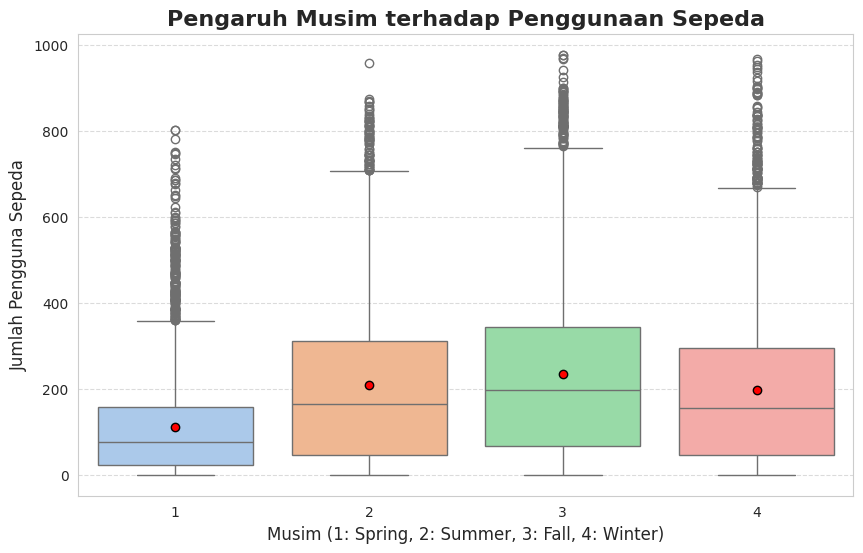

In [25]:
# Membuat boxplot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Palet warna untuk musim
palette = sns.color_palette("pastel")

# Membuat boxplot
sns.boxplot(
    x='season',
    y='cnt',
    data=data,
    palette=palette,
    showmeans=True,  # Menampilkan rata-rata
    meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "black"}
)

# Menambahkan elemen visual
plt.title('Pengaruh Musim terhadap Penggunaan Sepeda', fontsize=16, fontweight='bold')
plt.xlabel('Musim (1: Spring, 2: Summer, 3: Fall, 4: Winter)', fontsize=12)
plt.ylabel('Jumlah Pengguna Sepeda', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Menambahkan grid vertikal
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.show()

**Insight:**

Berdasarkan boxplot yang ditampilkan, dapat diinterpretasikan seperti berikut ini:
1. Penggunaan Sepeda berdasarkan Musim
  - Musim Semi atau Spring, penggunaan sepeda relatif lebih rendah dibandingkan musim lainnya. Rentang data (interquartile range/IQR) lebih kecil, yang menunjukkan distribusi data penggunaan sepeda lebih terkonsentrasi pada nilai rendah.
  - Musim Panas atau Summer, penggunaan sepeda meningkat secara signifikan, dengan median dan IQR yang lebih tinggi. Ini menunjukkan bahwa musim panas adalah periode puncak penggunaan sepeda.
  - Musim Gugur atau Fall, tingkat penggunaan sepeda masih tinggi, hampir setara dengan musim panas. Distribusi data juga cukup lebar, menunjukkan variasi yang besar dalam jumlah pengguna sepeda.
  - Musim Dingin atau Winter, penggunaan sepeda menurun kembali dibandingkan musim panas dan gugur, tetapi sedikit lebih tinggi daripada musim semi.

2. Rata-Rata Penggunaan

  Lingkaran merah menunjukkan rata-rata penggunaan sepeda di setiap musim. Rata-rata untuk musim panas dan gugur lebih tinggi dibandingkan musim semi dan musim dingin.

3. Outlier
  
  Titik-titik di luar whisker menunjukkan outlier, yaitu jumlah pengguna sepeda yang secara signifikan lebih tinggi dari distribusi utama. Outlier lebih sering ditemukan pada musim panas dan gugur, yang menunjukkan beberapa hari dengan jumlah pengguna sepeda yang sangat tinggi.

4. Distribusi Data

  Whisker menunjukkan rentang minimum dan maksimum (tidak termasuk outlier). Musim panas dan gugur memiliki whisker lebih panjang, menunjukkan distribusi data yang lebih lebar dibandingkan musim semi dan musim dingin.

Kesimpulan:

- Penggunaan sepeda paling tinggi terjadi pada musim panas dan gugur, sedangkan paling rendah pada musim semi.
- Cuaca yang lebih hangat di musim panas dan gugur mungkin menjadi faktor utama peningkatan jumlah pengguna sepeda.
- Adanya outlier di musim panas dan gugur menunjukkan bahwa beberapa hari memiliki aktivitas pengguna sepeda yang sangat tinggi, kemungkinan terkait dengan acara tertentu atau cuaca yang sangat mendukung.

### Pertanyaan 2 : Apakah terdapat hubungan yang signifikan antara suhu dan jumlah pengguna sepeda?

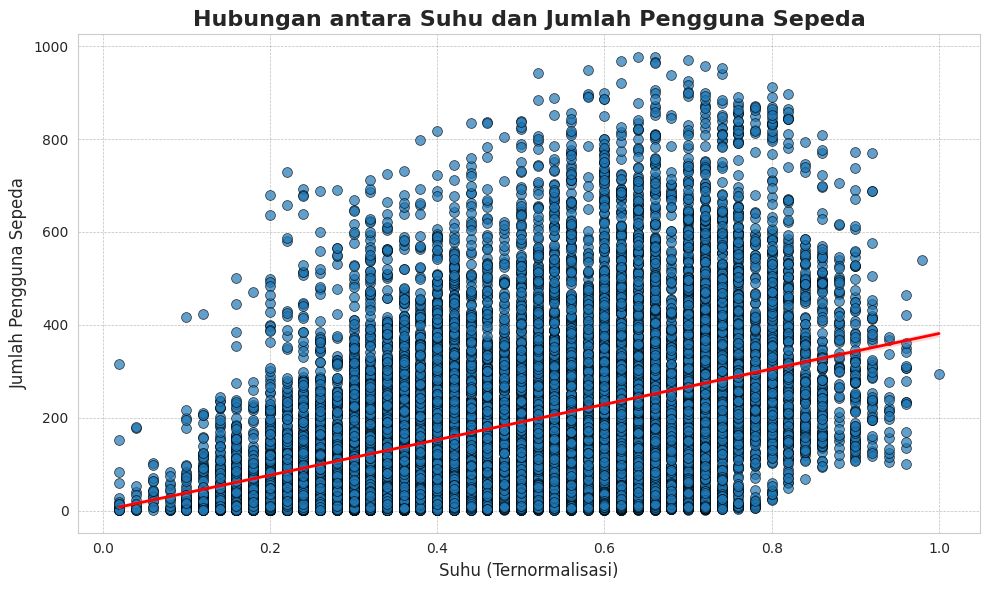

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot dengan seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=data, alpha=0.7, edgecolor='k', s=50)

# Tambahkan garis regresi untuk melihat pola hubungan
sns.regplot(x='temp', y='cnt', data=data, scatter=False, color='red', line_kws={'linewidth': 2})

# Judul dan label
plt.title('Hubungan antara Suhu dan Jumlah Pengguna Sepeda', fontsize=16, weight='bold')
plt.xlabel('Suhu (Ternormalisasi)', fontsize=12)
plt.ylabel('Jumlah Pengguna Sepeda', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Tampilkan plot
plt.tight_layout()
plt.show()


**Insight:**


Gambar di atas menunjukkan scatterplot yang menggambarkan hubungan antara suhu dan jumlah penggunaan sepeda. Berikut adalah interpretasi dari visualisasi gambar:
1. Trend Positif

  Terdapat hubungan positif antara suhu dan jumlah pengguna sepeda. Artinya, seiring dengan meningkatnya suhu, jumlah pengguna sepeda juga cenderung meningkat. Hal ini mungkin menunjukkan bahwa lebih banyak orang cenderung menggunakan sepeda saat cuaca lebih hangat.
2. Regresi Linear

  Garis merah yang ditampilkan adalah garis regresi linier, yang menunjukkan trend umum data. Garis ini mengonfirmasi bahwa ada hubungan positif antara suhu dan jumlah pengguna sepeda, di mana kenaikan suhu sebanding dengan peningkatan jumlah pengguna sepeda.
3. Penyebaran Data

  Walaupun ada tren yang jelas, data tampaknya cukup tersebar. Ini menunjukkan bahwa meskipun suhu mempengaruhi penggunaan sepeda, masih ada faktor lain yang dapat memengaruhi jumlah pengguna, seperti waktu dalam sehari, hari kerja, atau kondisi cuaca lainnya.

Secara keseluruhan, grafik ini menunjukkan bahwa suhu memainkan peran penting dalam menentukan jumlah pengguna sepeda, meskipun faktor lain mungkin juga memengaruhi pola penggunaan sepeda.

# Pertanyaan 3 : Apakah terdapat hubungan yang signifikan antara waktu dalam sehari dan jumlah pengguna sepeda?

<ipython-input-27-9cc89f4aff0c>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=time_of_day_trend, x='time_of_day', y='cnt', palette='Set2')


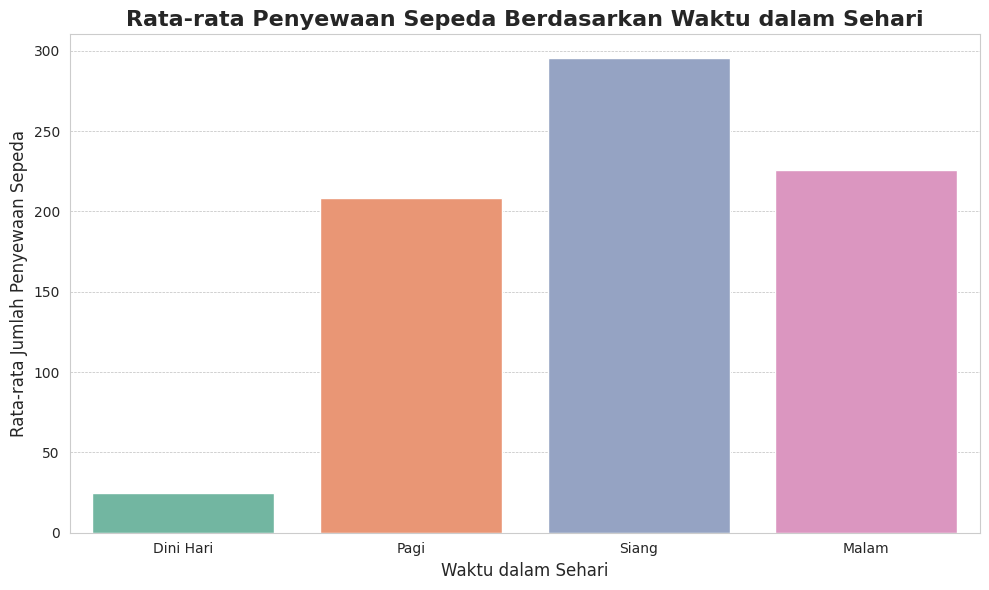

In [27]:
# Menambahkan kolom waktu dalam sehari berdasarkan jam
def classify_time(hour):
    if 0 <= hour < 6:
        return 'Dini Hari'
    elif 6 <= hour < 12:
        return 'Pagi'
    elif 12 <= hour < 18:
        return 'Siang'
    else:
        return 'Malam'

data['time_of_day'] = data['hr'].apply(classify_time)

# Mengelompokkan data berdasarkan kategori waktu
time_of_day_trend = data.groupby('time_of_day')['cnt'].mean().reset_index()

# Menentukan urutan kategori waktu
time_of_day_trend['time_of_day'] = pd.Categorical(
    time_of_day_trend['time_of_day'],
    categories=['Dini Hari', 'Pagi', 'Siang', 'Malam'],
    ordered=True
)
time_of_day_trend = time_of_day_trend.sort_values('time_of_day')

# Membuat bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=time_of_day_trend, x='time_of_day', y='cnt', palette='Set2')

# Menambahkan detail pada plot
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Waktu dalam Sehari', fontsize=16, weight='bold')
plt.xlabel('Waktu dalam Sehari', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda', fontsize=12)
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Tampilkan plot
plt.tight_layout()
plt.show()

**Insight:**

Grafik tersebut menunjukkan rata-rata penyewaan sepeda berdasarkan waktu dalam sehari, yang terbagi menjadi empat kategori: dini hari, pagi, siang, dan malam. Hasilnya menunjukkan bahwa penyewaan sepeda paling rendah terjadi pada dini hari (00:00–06:00), yang wajar karena kebanyakan orang beristirahat pada waktu tersebut. Pada pagi hari (06:00–12:00), penyewaan meningkat, kemungkinan besar karena aktivitas seperti pergi bekerja atau berolahraga. Penyewaan mencapai puncaknya pada siang hari (12:00–18:00), mencerminkan waktu paling aktif, mungkin untuk aktivitas pekerjaan, rekreasi, atau perjalanan singkat. Pada malam hari (18:00–24:00), penyewaan menurun dibandingkan siang hari, tetapi tetap lebih tinggi dibandingkan pagi dan dini hari, yang menunjukkan aktivitas sore hingga malam seperti pulang kerja atau rekreasi. Pola ini mencerminkan bagaimana ritme kehidupan sehari-hari memengaruhi tren penggunaan sepeda, dengan waktu siang sebagai periode paling sibuk. Penyedia layanan dapat menggunakan informasi ini untuk mengoptimalkan pengelolaan sepeda dan merancang promosi untuk periode yang kurang sibuk seperti dini hari.

# Pertanyaan 4 : Apakah ada perbedaan signifikan dalam jumlah penyewaan sepeda antara tahun pertama (2011) dan tahun kedua (2012)?

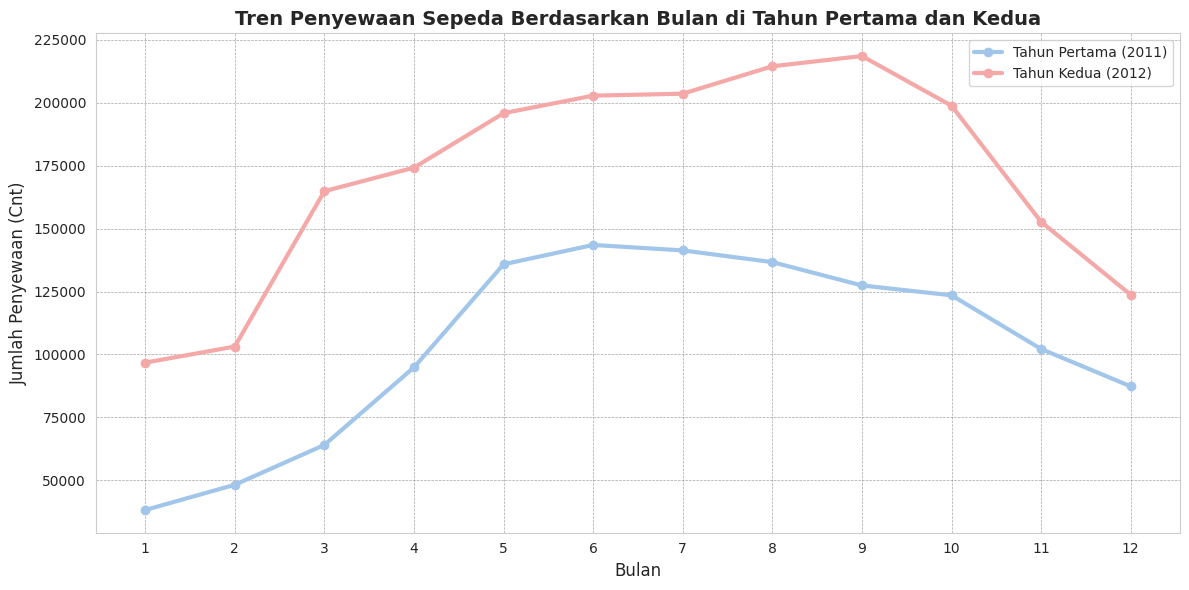

In [28]:
# Agregasi data berdasarkan tahun dan bulan
monthly_data = data.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()

# Pisahkan data berdasarkan tahun
data_2011 = monthly_data[monthly_data['yr'] == 0]  # Tahun pertama (2011)
data_2012 = monthly_data[monthly_data['yr'] == 1]  # Tahun kedua (2012)

# Plot data dengan warna pastel
plt.figure(figsize=(12, 6))
plt.plot(data_2011['mnth'], data_2011['cnt'], marker='o', label='Tahun Pertama (2011)', color='#A1C6EA', linewidth=3)
plt.plot(data_2012['mnth'], data_2012['cnt'], marker='o', label='Tahun Kedua (2012)', color='#F4A9A8', linewidth=3)

# Judul dan label
plt.title('Tren Penyewaan Sepeda Berdasarkan Bulan di Tahun Pertama dan Kedua', fontsize=14, weight='bold')
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Penyewaan (Cnt)', fontsize=12)
plt.xticks(range(1, 13))  # Pastikan sumbu x menunjukkan angka 1-12 untuk bulan
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Tambahkan legenda
plt.legend()

# Tampilkan plot
plt.tight_layout()
plt.show()

**Insight:**

1. **Tren Penyewaan Sepeda Berdasarkan Bulan**:
   - **Tahun Pertama (2011)**:
     - Penyewaan sepeda meningkat dari bulan Januari (1) hingga mencapai puncaknya pada bulan Mei (5) dan Juni (6).
     - Setelah bulan Juni, jumlah penyewaan mulai menurun secara bertahap hingga akhir tahun, dengan penurunan signifikan pada bulan November (11) dan Desember (12).
   - **Tahun Kedua (2012)**:
     - Tren serupa terlihat, dengan penyewaan yang meningkat tajam dari Januari hingga mencapai puncak di bulan Juni hingga Agustus (8).
     - Namun, dibandingkan dengan tahun pertama, penyewaan sepeda pada tahun kedua lebih tinggi, terutama pada bulan-bulan musim panas.
     - Setelah Agustus, jumlah penyewaan juga mulai menurun, tetapi tetap lebih tinggi dibandingkan tahun pertama pada bulan-bulan akhir tahun.

2. **Perbandingan Tahun Pertama dan Kedua**:
   - Tahun kedua secara keseluruhan menunjukkan jumlah penyewaan sepeda yang lebih tinggi dibandingkan tahun pertama di semua bulan.
   - Hal ini dapat mengindikasikan peningkatan popularitas layanan penyewaan sepeda atau adanya faktor lain seperti perbaikan infrastruktur atau promosi.

3. **Musim dan Penyewaan Sepeda**:
   - Bulan-bulan dengan jumlah penyewaan tertinggi adalah pada musim semi dan musim panas (Mei hingga Agustus).
   - Penurunan signifikan terjadi di musim gugur dan musim dingin (November dan Desember), kemungkinan karena cuaca yang kurang mendukung untuk bersepeda.

## Analisis Lanjutan (Opsional)

In [29]:
# Konversi 'dteday' ke format datetime
datafix['dteday'] = pd.to_datetime(datafix['dteday'])

# RFM Calculation berdasarkan musim
today_date = datafix['dteday'].max()  # Tanggal terakhir dalam dataset
rfm_season = datafix.groupby('season').agg(
    Recency=('dteday', lambda x: (today_date - x.max()).days),
    Frequency=('instant', 'count'),
    Monetary=('cnt', 'sum')
).reset_index()

# Mapping season ke deskripsi musim
season_mapping = {
    1: 'Musim Semi',
    2: 'Musim Panas',
    3: 'Musim Gugur',
    4: 'Musim Dingin'
}
rfm_season['season'] = rfm_season['season'].map(season_mapping)

print(rfm_season)

         season  Recency  Frequency  Monetary
0    Musim Semi        0       4235    465985
1   Musim Panas      194       4355    875227
2   Musim Gugur      100       4378    963756
3  Musim Dingin       11       4167    787737


<ipython-input-30-1d094f44f633>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-30-1d094f44f633>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-30-1d094f44f633>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


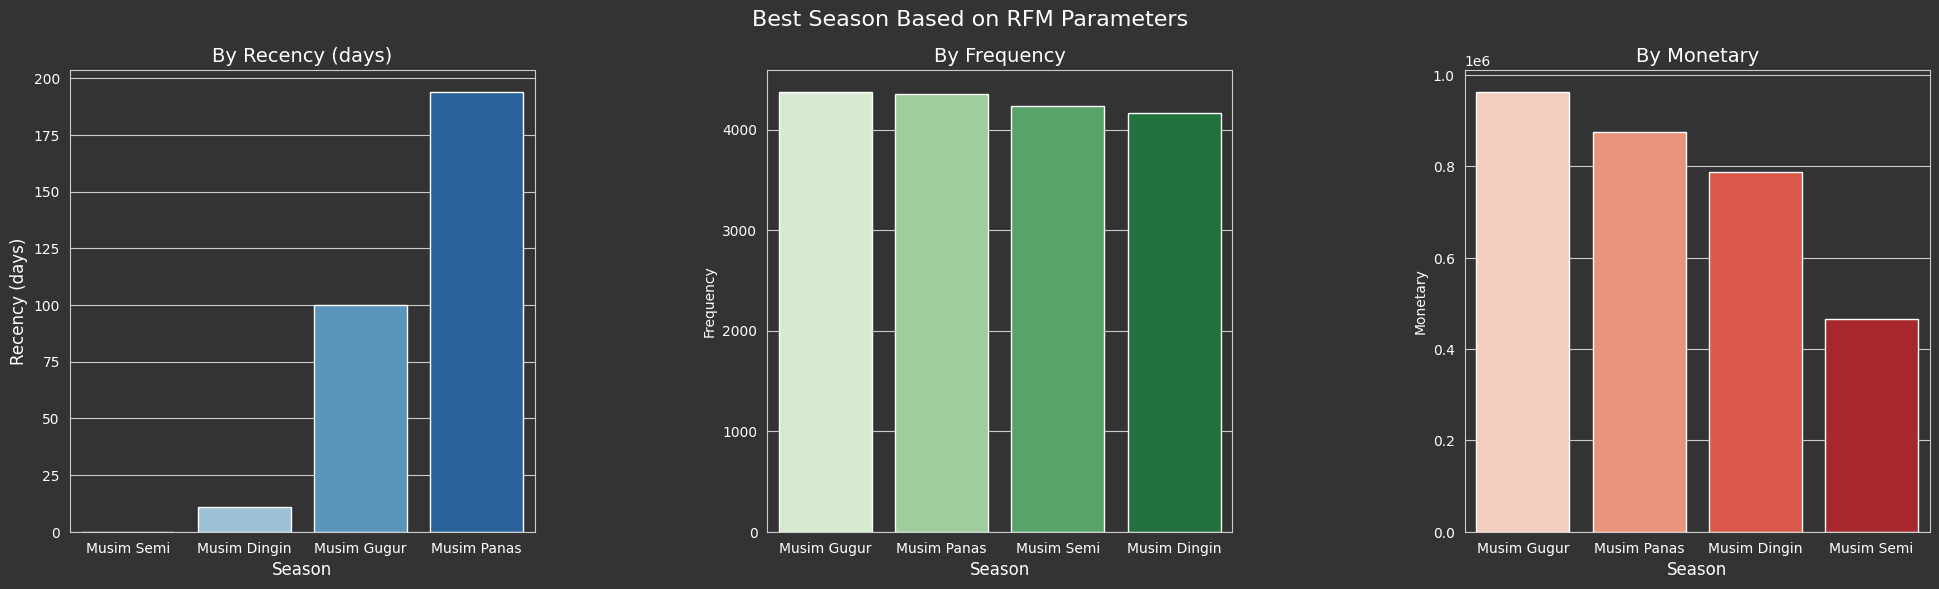

In [30]:
# Top N customers berdasarkan setiap dimensi RFM berdasarkan musim
top_n = 5  # Atur jumlah top customers yang akan divisualisasikan

# Ambil top N untuk masing-masing dimensi berdasarkan musim
top_recency_season = rfm_season[['season', 'Recency']].nsmallest(top_n, 'Recency')
top_frequency_season = rfm_season[['season', 'Frequency']].nlargest(top_n, 'Frequency')
top_monetary_season = rfm_season[['season', 'Monetary']].nlargest(top_n, 'Monetary')

# Setup plotting
fig, axes = plt.subplots(1, 3, figsize=(24, 6), sharey=False)
fig.patch.set_facecolor('#333333')  # Warna latar belakang figure
plt.subplots_adjust(wspace=0.5)

# Plot Recency
sns.barplot(
    x=top_recency_season['season'],
    y=top_recency_season['Recency'],
    ax=axes[0],
    palette='Blues'
)
axes[0].set_title('By Recency (days)', fontsize=14, color='white')
axes[0].set_xlabel('Season', fontsize=12, color='white')
axes[0].set_ylabel('Recency (days)', fontsize=12, color='white')
axes[0].tick_params(colors='white')

# Plot Frequency
sns.barplot(
    x=top_frequency_season['season'],
    y=top_frequency_season['Frequency'],
    ax=axes[1],
    palette='Greens'
)
axes[1].set_title('By Frequency', fontsize=14, color='white')
axes[1].set_xlabel('Season', fontsize=12, color='white')
axes[1].tick_params(colors='white')

# Plot Monetary
sns.barplot(
    x=top_monetary_season['season'],
    y=top_monetary_season['Monetary'],
    ax=axes[2],
    palette='Reds'
)
axes[2].set_title('By Monetary', fontsize=14, color='white')
axes[2].set_xlabel('Season', fontsize=12, color='white')
axes[2].tick_params(colors='white')

# Adjust background and titles
for ax in axes:
    ax.set_facecolor('#333333')
    ax.yaxis.label.set_color('white')

fig.suptitle('Best Season Based on RFM Parameters', fontsize=16, color='white')
plt.show()

Dari grafik yang ditampilkan, berikut adalah interpretasi dari Best Season on RFM Parameters

### 1. **By Recency (days)**:
   - **Interpretasi**:
    - Musim Semi (Recency = 0)

      Pelanggan di musim ini baru saja melakukan transaksi terakhir (pada tanggal yang sama dengan tanggal maksimal dalam dataset). Ini menunjukkan bahwa pelanggan sangat aktif di musim ini.

    - Musim Dingin (Recency = 11)

      Pelanggan terakhir melakukan pembelian 11 hari sebelum tanggal terakhir dalam dataset, menunjukkan bahwa pelanggan di musim ini masih cukup aktif, meskipun sedikit lebih lama dibandingkan musim Semi.

    - Musim Gugur (Recency = 100)
      
      Pelanggan terakhir kali membeli produk sekitar 100 hari sebelum akhir dataset. Aktivitas pelanggan sudah mulai berkurang dibandingkan dengan musim sebelumnya.

    - Musim Panas (Recency = 194)

      Pelanggan terakhir kali melakukan transaksi hampir 200 hari sebelum akhir dataset, menunjukkan bahwa pelanggan di musim ini memiliki jeda yang cukup lama sejak pembelian terakhirnya.

### 2. **By Frequency**:
   - **Interpretasi**:
    - Musim Gugur (Frequency = 4378)

      Musim ini memiliki frekuensi transaksi tertinggi, menunjukkan bahwa pelanggan lebih sering bertransaksi selama musim ini dibandingkan dengan musim lainnya.

    - Musim Panas (Frequency = 4355)

      Musim ini juga memiliki frekuensi transaksi yang sangat tinggi, hampir setara dengan Musim Gugur, menunjukkan bahwa pelanggan juga cukup aktif dalam melakukan pembelian.

    - Musim Semi (Frequency = 4235)
      
      Frekuensi transaksi di musim ini cukup tinggi, tetapi lebih rendah dibandingkan dengan Musim Panas dan Gugur.
      
    - Musim Dingin (Frequency = 4167):

      Frekuensi transaksi di musim ini adalah yang paling rendah di antara semua musim, tetapi masih menunjukkan aktivitas yang signifikan.

### 3. **By Monetary**:
   - **Interpretasi**:
    - Musim Gugur (Monetary = 963756):

      Musim ini memiliki total pengeluaran pelanggan tertinggi. Pelanggan di musim ini menghabiskan uang lebih banyak daripada musim lainnya.

    - Musim Panas (Monetary = 875227):
      
      Musim ini memiliki total pengeluaran pelanggan tertinggi kedua. Pengeluaran ini hampir menyamai Musim Gugur.
    
    - Musim Dingin (Monetary = 787737):
      
      Musim ini memiliki total pengeluaran tertinggi ketiga, menunjukkan bahwa pelanggan di musim ini masih cukup aktif dalam pengeluaran.

    - Musim Semi (Monetary = 465985):
      
      Musim ini memiliki pengeluaran terendah dibandingkan dengan musim lainnya, meskipun pelanggan baru saja bertransaksi (Recency = 0).

### Kesimpulan Umum:
1. Musim Semi:
  
    Pelanggan di musim ini baru saja melakukan transaksi terakhir (Recency = 0), tetapi total pengeluaran (Monetary) paling rendah, meskipun frekuensinya cukup tinggi.

2. Musim Panas:

    Pelanggan di musim ini memiliki frekuensi transaksi yang sangat tinggi (Frequency = 4355) dan total pengeluaran yang signifikan (Monetary = 875227). Namun, pembelian terakhirnya sudah cukup lama (Recency = 194).

3. Musim Gugur:

    Ini adalah musim terbaik secara keseluruhan, karena memiliki frekuensi tertinggi (Frequency = 4378) dan total pengeluaran tertinggi (Monetary = 963756). Namun, pelanggan sudah mulai jarang melakukan transaksi (Recency = 100).

4. Musim Dingin:

    Musim ini memiliki pelanggan yang cukup aktif dengan Recency rendah (11 hari), meskipun frekuensinya adalah yang terendah (Frequency = 4167). Total pengeluaran di musim ini juga signifikan (Monetary = 787737).


## Conclusion

**- Apakah ada pola musiman yang konsisten yang dapat dimanfaatkan untuk perencanaan operasional?**

  Terdapat pola musiman yang jelas dalam penggunaan sepeda, dengan puncak penggunaan terjadi pada musim panas dan gugur, sementara musim semi dan dingin menunjukkan penurunan signifikan. Pola ini dapat dimanfaatkan untuk perencanaan operasional, seperti meningkatkan armada dan fasilitas pada musim puncak serta merencanakan promosi untuk menarik pengguna di musim yang lebih sepi.

**- Apakah terdapat hubungan yang signifikan antara suhu dan jumlah pengguna sepeda?**

  Ya, terdapat hubungan yang signifikan antara suhu dan jumlah pengguna sepeda. Berdasarkan scatterplot dan garis regresi yang ditampilkan, terlihat bahwa seiring dengan meningkatnya suhu, jumlah pengguna sepeda juga cenderung meningkat. Hal ini menunjukkan bahwa suhu yang lebih tinggi mendorong lebih banyak orang untuk menggunakan sepeda, menciptakan hubungan positif antara kedua variabel tersebut. Meskipun terdapat variasi dalam data, tren umum ini cukup konsisten, mengindikasikan suhu sebagai faktor utama dalam mempengaruhi penggunaan sepeda.

**- Apakah terdapat hubungan yang signifikan antara waktu dalam sehari dan jumlah pengguna sepeda?**

  Berdasarkan grafik, terdapat hubungan yang signifikan antara waktu dalam sehari dan jumlah pengguna sepeda. Penyewaan sepeda cenderung lebih tinggi pada pagi dan siang hari, dengan puncak tertinggi pada siang. Sebaliknya, dini hari menunjukkan jumlah penyewaan yang sangat rendah, dan malam sedikit lebih tinggi daripada dini hari. Pola ini menunjukkan bahwa waktu dalam sehari memengaruhi permintaan sepeda, dengan aktivitas yang lebih tinggi di pagi dan siang hari, sementara dini hari menjadi periode paling sepi.


**- Apakah ada perbedaan signifikan dalam jumlah penyewaan sepeda antara tahun pertama (2011) dan tahun kedua (2012)?**

  Ya, terdapat perbedaan signifikan dalam jumlah penyewaan sepeda antara tahun pertama (2011) dan tahun kedua (2012). Pada tahun 2012, jumlah penyewaan sepeda lebih tinggi secara konsisten dibandingkan tahun 2011, terutama pada bulan-bulan puncak seperti musim panas dan gugur. Hal ini terlihat dari tren yang lebih tinggi pada garis yang mewakili tahun 2012 dalam line plot yang ditampilkan.



In [31]:
!streamlit run streamlit_app.py & npx localtunnel --port 8501

/bin/bash: line 1: streamlit: command not found
⠙⠹⠸⠼⠴⠦Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) ^C
